# Hierarchical Clustering
## Imports

In [115]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

## Loading and Preprocessing the Dataset

In [116]:
# Load dataset
data = pd.read_csv('../machineLearning/data/penguins_lter.csv')

# Preprocess the dataset easily and cheaply by just dropping all NaNs instead of dealing with them to preserve the record.
data.dropna(inplace=True)

## Separate Features and Class Labels

In [117]:
X_features = data[['Culmen Length (mm)', 'Culmen Depth (mm)', 'Flipper Length (mm)']]
y_labels = pd.DataFrame(data[['Individual ID']])

## Visualize the Dendrograms to Analyze

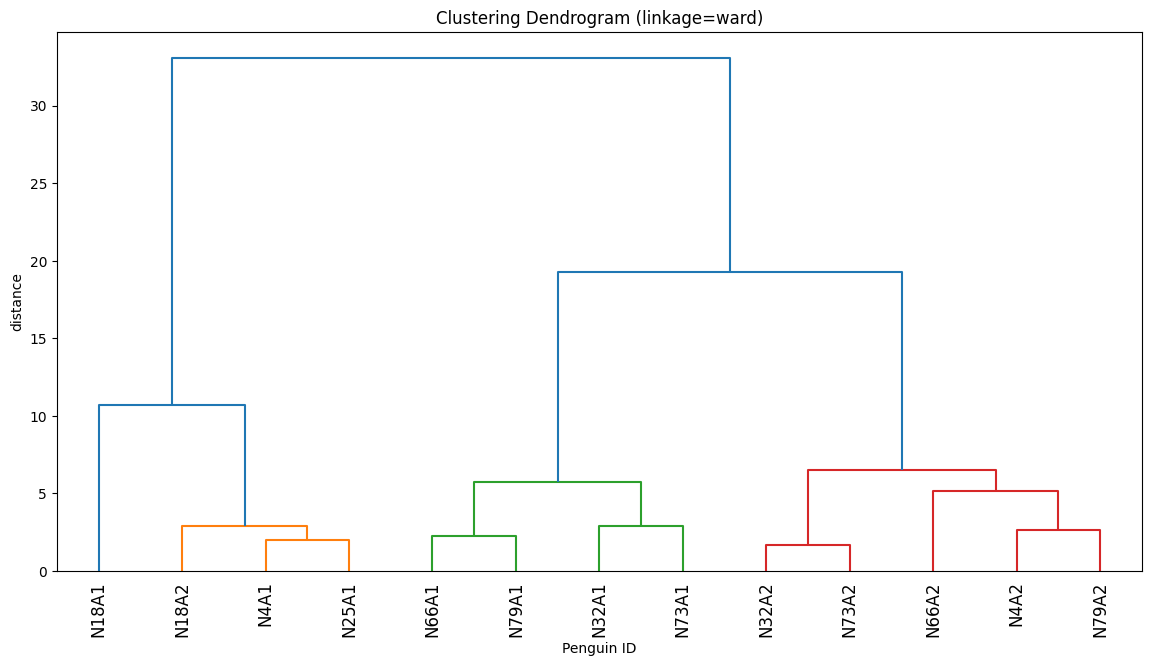

In [118]:
linkage_matrix = linkage(X_features, 'ward')
plot = plt.figure(figsize=(14, 7))
labels = list(y_labels['Individual ID'])

dendrogram(
    linkage_matrix,
    leaf_rotation=90., 
    leaf_font_size=12.,
    color_threshold=10, # Use this to differentiate clusters below a specified distance to aid in cluster quantity selection.
    labels= labels
)
plt.title('Clustering Dendrogram (linkage=ward)')
plt.xlabel('Penguin ID')
plt.ylabel('distance')
plt.show()

## Implement the Model

In [119]:
# Set Desired Amount of Clusters to Test
model = AgglomerativeClustering(linkage="ward", n_clusters=4)

# Fit the Model
model.fit(X_features)
predicted_labels = model.labels_

clusterAssignments = y_labels
clusterAssignments['Cluster Assignment'] = predicted_labels

clusterAssignments.sort_values(by='Cluster Assignment', ascending= True)

,Individual ID,Cluster Assignment
7,N4A2,0
69,N32A2,0
131,N73A2,0
121,N66A2,0
139,N79A2,0
38,N25A1,1
29,N18A2,1
6,N4A1,1
138,N79A1,2
120,N66A1,2


## Summary
Using the code, I was able to color the dendrogram to visually indicate where my clusters would be and how many I'd need to set my model at. Then I was able to match up which IDs got assigned to which clusters in the same dataframe so that I could continue to use the data for further use post-clustering.

# Prophet
## Additional Imports

In [120]:
from prophet import Prophet

## Loading the Dataset

In [121]:
timeSeriesData = pd.read_csv('../machineLearning/data/MLTempDataset.csv')
timeSeriesFormatData = timeSeriesData[['Datetime', 'DAYTON_MW']]
timeSeriesFormatData = timeSeriesFormatData.rename(columns={'Datetime':'ds', 'DAYTON_MW':'y'})

timeSeriesFormatData.tail()

,ds,y
6671,2022-10-08 23:00:00,27.350
6672,2022-10-09 00:00:00,26.800
6673,2022-10-09 01:00:00,26.450
6674,2022-10-09 02:00:00,25.900
6675,2022-10-09 03:00:00,25.567


## Fitting the Model

In [122]:
timeModel = Prophet()
timeModel.fit(timeSeriesFormatData)

22:24:43 - cmdstanpy - INFO - Chain [1] start processing
22:24:44 - cmdstanpy - INFO - Chain [1] done processing


## Forcasting Additional Values

In [123]:
future = timeModel.make_future_dataframe(periods=365)
forecast = timeModel.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7036,2023-10-05 03:00:00,29.832924,-25.860384,81.329739
7037,2023-10-06 03:00:00,31.508376,-23.527409,84.747830
7038,2023-10-07 03:00:00,30.167641,-26.256558,84.386387
7039,2023-10-08 03:00:00,29.420967,-28.217921,83.916950
7040,2023-10-09 03:00:00,28.794049,-27.443960,83.525621


## Plot the Data

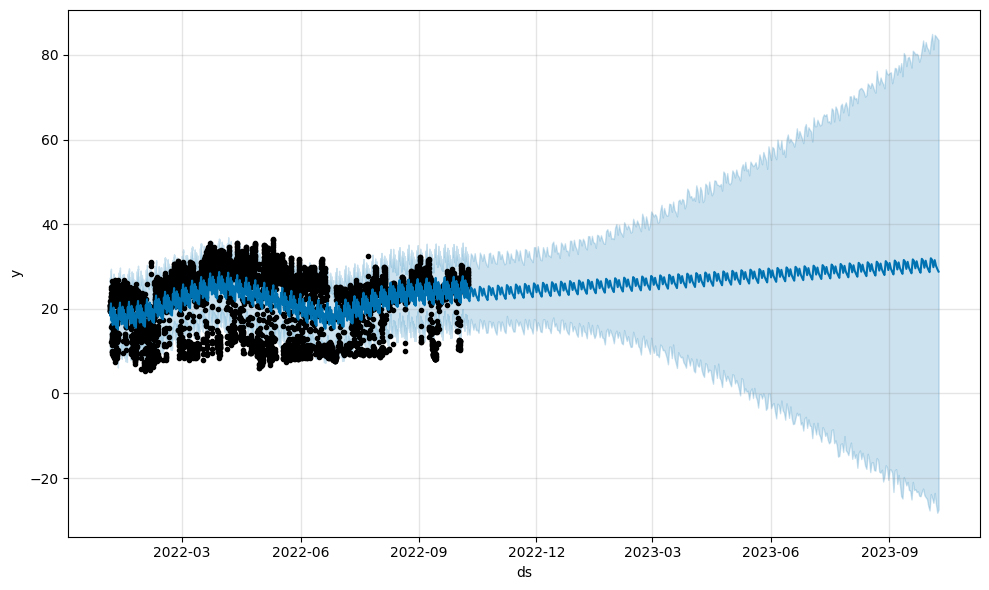

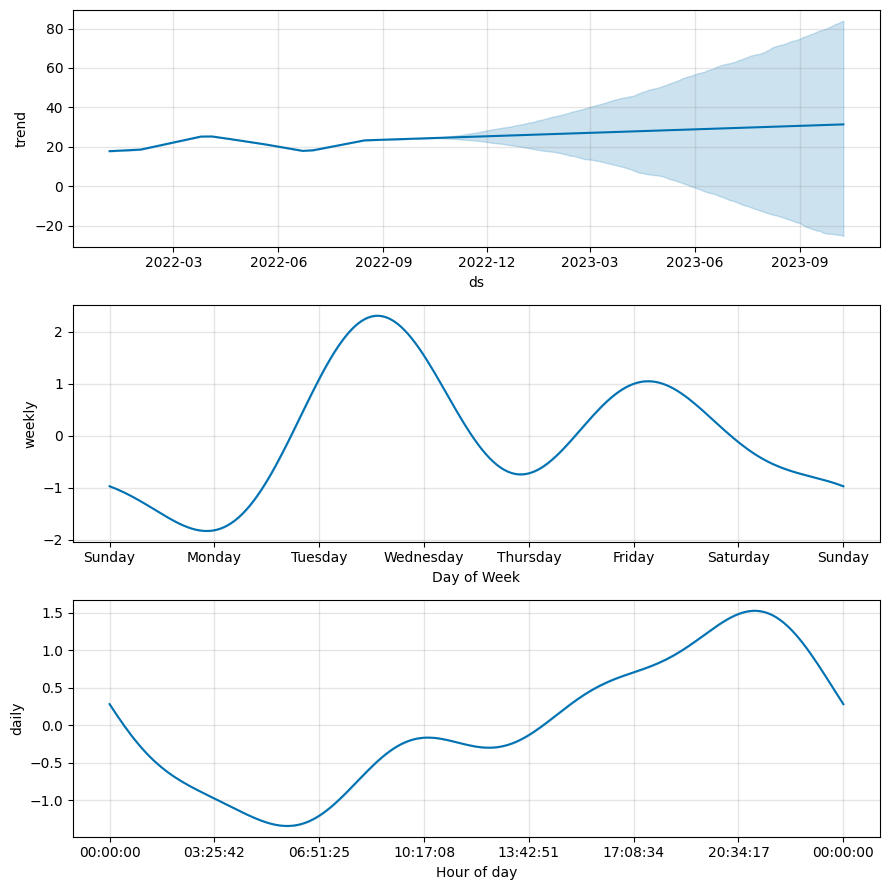

In [124]:
fig1 = timeModel.plot(forecast)
fig2 = timeModel.plot_components(forecast)

## Summary
The model works and does forcast out values that seem like the follow the trend, however, you can tell that the forcasting gets less accurate the further we go out with such a small dataset. This would probably need to be tweaked more to provide better insights or do more analysis on this test dataset to determine its viability for forcasting out this far.

# References
Hierarchical Clustering Dataset: https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download
Hierarchical Clustering Model Tutorial: http://pythoninai.com/hierarchical-clustering-python-iris/
Prophet Dataset: https://www.kaggle.com/datasets/vitthalmadane/ts-temp-1/data
Prophet Model Tutorial: https://facebook.github.io/prophet/docs/quick_start.html